In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import sklearn.metrics 
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_confusion_matrix
import matplotlib.cm as cm
import seaborn as sns
import math

**DATA PREPROCESSING - DATA CLEANING**


In [ ]:
#Reading the txt file and converting to dataframe(Only the important rows were imported)
data = pd.read_csv('/content/Carbig.txt',  header = [0],sep='\s+') 
data=data[data['Cylinders']!=3.0]   #Removing rows with 3 and 5 cylinders
data=data[data['Cylinders']!=5.0]
data['Cylinders'].unique()

array([8., 4., 6.])

In [ ]:
#Droping NAN rows
data = data.dropna()
data.isna().sum()

Acceleration    0
Cylinders       0
Displacement    0
Horsepower      0
MPG             0
Weight          0
dtype: int64

In [ ]:
data.reset_index(drop=True,inplace=True)

In [ ]:
data

,Acceleration,Cylinders,Displacement,Horsepower,MPG,Weight
0,12.0,8.0,307.0,130.0,18.0,3504.0
1,11.5,8.0,350.0,165.0,15.0,3693.0
2,11.0,8.0,318.0,150.0,18.0,3436.0
3,12.0,8.0,304.0,150.0,16.0,3433.0
4,10.5,8.0,302.0,140.0,17.0,3449.0
...,...,...,...,...,...,...
380,15.6,4.0,140.0,86.0,27.0,2790.0
381,24.6,4.0,97.0,52.0,44.0,2130.0
382,11.6,4.0,135.0,84.0,32.0,2295.0
383,18.6,4.0,120.0,79.0,28.0,2625.0


**Q2,3,4,5 DATA PLOTTING**


I will plot the data to see which features are important so that the data can be clustered into 3 groups.

As we saw from the above plots, these plots were not very informative, Now we will plot 3d plots to see the relation between each of the features and the cylinders

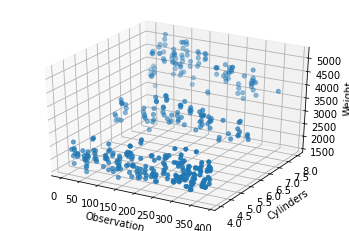

In [ ]:
data['index']=data.index
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(data['index'], data['Cylinders'],data['Weight'],cmap='viridis', linewidth=0.5)
ax.set_xlabel('Observation')
ax.set_ylabel('Cylinders')
ax.set_zlabel('Weight');

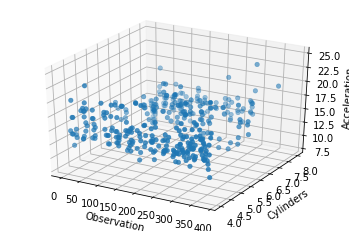

In [ ]:
data['index']=data.index
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(data['index'], data['Cylinders'],data['Acceleration'],cmap='viridis', linewidth=0.5)
ax.set_xlabel('Observation')
ax.set_ylabel('Cylinders')
ax.set_zlabel('Acceleration');

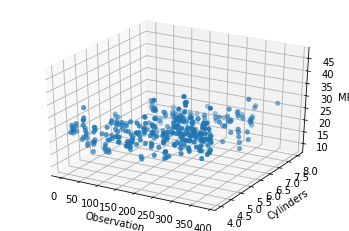

In [ ]:
data['index']=data.index
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(data['index'], data['Cylinders'],data['MPG'],cmap='viridis', linewidth=0.5)
ax.set_xlabel('Observation')
ax.set_ylabel('Cylinders')
ax.set_zlabel('MPG');

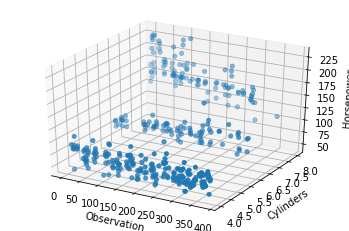

In [ ]:
data['index']=data.index
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(data['index'], data['Cylinders'],data['Horsepower'],cmap='viridis', linewidth=0.5)
ax.set_xlabel('Observation')
ax.set_ylabel('Cylinders')
ax.set_zlabel('Horsepower');

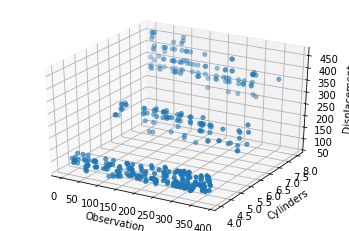

In [ ]:
data['index']=data.index
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(data['index'], data['Cylinders'],data['Displacement'],cmap='viridis', linewidth=0.5)
ax.set_xlabel('Observation')
ax.set_ylabel('Cylinders')
ax.set_zlabel('Displacement');

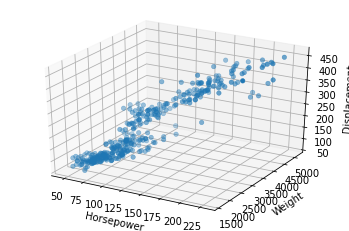

In [ ]:
data['index']=data.index
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(data['Horsepower'], data['Weight'],data['Displacement'],cmap='viridis', linewidth=0.5)
ax.set_xlabel('Horsepower')
ax.set_ylabel('Weight')
ax.set_zlabel('Displacement');

As we saw from the above plots, Horsepower, Displacement and Weight gave us the best results to cluster the data into 3 subgroups. But MPG and acceleration, both did not give satisfactory results and we could not differentiate between cylinders. Now we will plot subplots to see the relation between each of the features


Now we will plot box plots of each of the features with respect to the cylinders

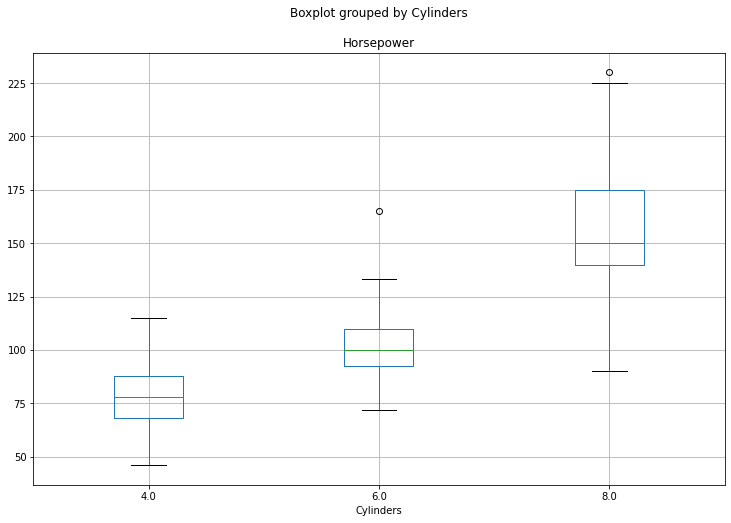

In [ ]:
boxplot = data.boxplot(column=[ 'Horsepower'],by='Cylinders',figsize=(12,8))

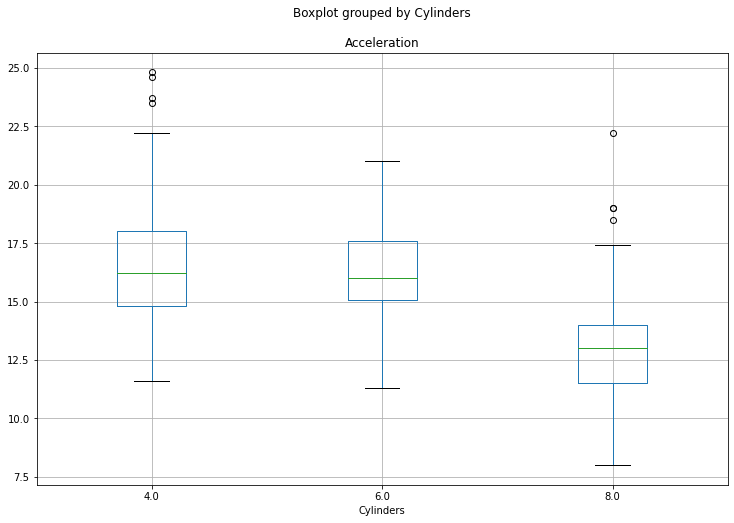

In [ ]:
boxplot = data.boxplot(column=[ 'Acceleration'],by='Cylinders',figsize=(12,8))

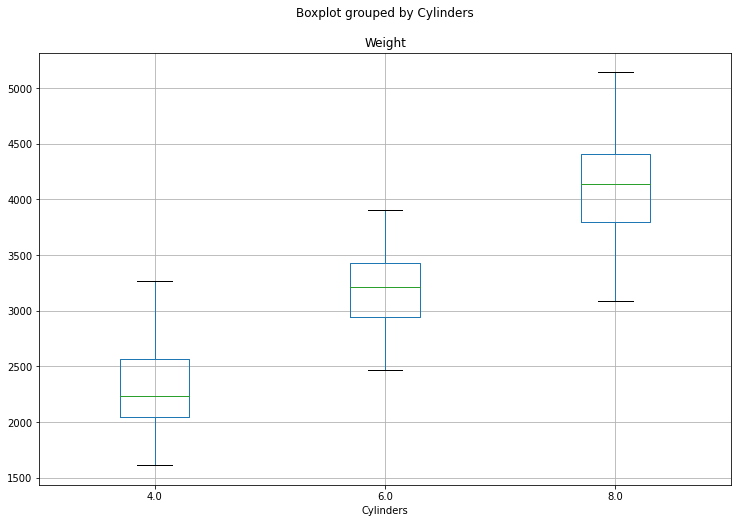

In [ ]:
boxplot = data.boxplot(column=[ 'Weight'],by='Cylinders',figsize=(12,8))

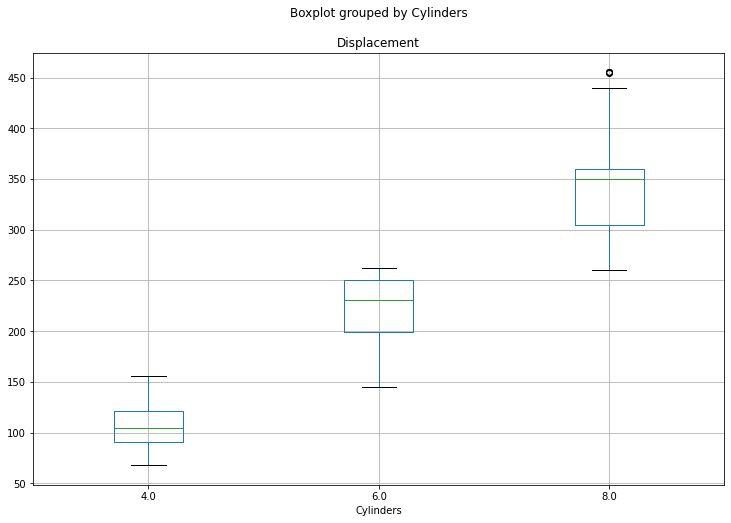

In [ ]:
boxplot = data.boxplot(column=[ 'Displacement'],by='Cylinders',figsize=(12,8))

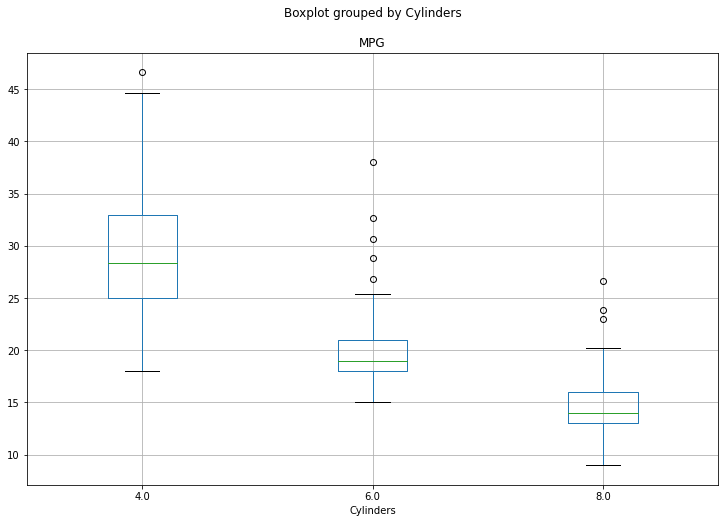

In [ ]:
boxplot = data.boxplot(column=[ 'MPG'],by='Cylinders',figsize=(12,8))

From all these plots we can easily make out that the features displacement, weight and horsepower are different for different cylinders and not many of the values overlap . So these can be used as features.

Whereas for acceleration, there is no difference between 4 and 6 cyclinders. Hence their values overlap. Therefore there is no way to distinguish between 4 and 6 cylinders. Both of them would be clustered together hence we would not use this as a feature.

Finally for MPG as well, some of its values for 6 cylinders greater than the 3rd quartile seem to overlap with the values of 4 cylinders. Hence it might be better to not use this as a feature.

*Now we will normalize the data so that the parallel coordinate plot can be used to check for features*

In [ ]:
data2=data.copy()

In [ ]:
data2['Acceleration']=(data2['Acceleration']-data2['Acceleration'].mean())/data2['Acceleration'].std()

In [ ]:
data2['Displacement']=(data2['Displacement']-data2['Displacement'].mean())/data2['Displacement'].std()

In [ ]:
data2['Horsepower']=(data2['Horsepower']-data2['Horsepower'].mean())/data2['Horsepower'].std()

In [ ]:
data2['MPG']=(data2['MPG']-data2['MPG'].mean())/data2['MPG'].std()

In [ ]:
data2['Weight']=(data2['Weight']-data2['Weight'].mean())/data2['Weight'].std()

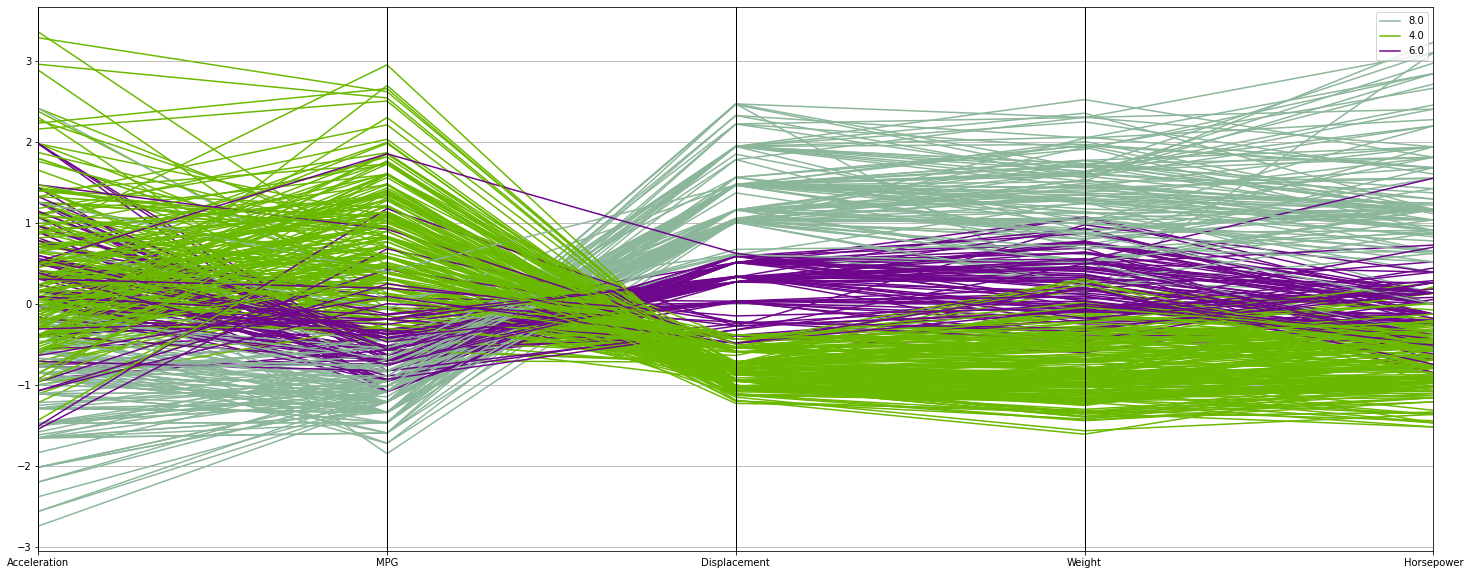

In [ ]:
#Plotting the parallel coordinate plot wrt cylinders
plt.figure(figsize=(25,10))
pd.plotting.parallel_coordinates(data2,'Cylinders',cols=['Acceleration','MPG','Displacement','Weight','Horsepower'])


Similar to box plots, we can make out that the features displacement, weight and horsepower are different for different cylinders and not many of the values overlap . So these can be used as features.

Whereas for acceleration, all the values are overlapping and it is different to differentiate and cluster the cylinders.

Finally for MPG as well, some of its values are overlapping, hence it is better not to use this as a feature

**Q6,7,8 CLUSTERING**

To cluster, we will drop the Acceleration columns due to reasons discussed above and will not use them as features.
Since the problem is unsupervised, we will also drop Cylinders

In [ ]:
#Dropping the columns which would not be used as features.
X=data.drop(columns=['Acceleration','Cylinders'])
classdata=data.copy()
for x in range(len(classdata['Cylinders'])):
  if x<len(classdata['Cylinders']):
    if classdata['Cylinders'][(x)]==4:
      classdata['Cylinders'][(x)]='4 cylinder'
    elif classdata['Cylinders'][(x)]==6:
      classdata['Cylinders'][(x)]='6 cylinder'
    elif classdata['Cylinders'][(x)]==8:
      classdata['Cylinders'][(x)]='8 cylinder'
Y=classdata['Cylinders']
Y

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impor

0      8 cylinder
1      8 cylinder
2      8 cylinder
3      8 cylinder
4      8 cylinder
          ...    
380    4 cylinder
381    4 cylinder
382    4 cylinder
383    4 cylinder
384    4 cylinder
Name: Cylinders, Length: 385, dtype: object

Normalizing and Scaling the values

In [ ]:
# Create the instance of the scaler
scaler = StandardScaler()
# Transform the inputs X
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.06068649,  0.65374156, -0.69575122,  0.61111185, -1.7275578 ],
       [ 1.47181877,  1.55798787, -1.07905323,  0.83263993, -1.7185601 ],
       [ 1.16585987,  1.17045374, -0.69575122,  0.53140862, -1.70956241],
       ...,
       [-0.58384259, -0.53469645,  1.09299149, -0.80596462,  1.70956241],
       [-0.72726083, -0.66387449,  0.58192214, -0.41916955,  1.7185601 ],
       [-0.73682204, -0.58636766,  0.96522415, -0.30781946,  1.7275578 ]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,Y,test_size=.3,random_state=12,stratify=Y)
y_test

334    4 cylinder
152    8 cylinder
288    4 cylinder
276    4 cylinder
376    6 cylinder
          ...    
3      8 cylinder
299    6 cylinder
215    4 cylinder
119    4 cylinder
50     4 cylinder
Name: Cylinders, Length: 116, dtype: object

In [ ]:
np.unique(y_train,return_counts=True)

(array(['4 cylinder', '6 cylinder', '8 cylinder'], dtype=object),
 array([139,  58,  72]))

In [ ]:
np.unique(y_test,return_counts=True)

(array(['4 cylinder', '6 cylinder', '8 cylinder'], dtype=object),
 array([60, 25, 31]))

Here we can clearly see that the ratio of the training set and testing set cylinders is the same. ie 

For Training set 4:6:8 = 0.5:0.2:0.3

For Testing set 4:6:8 = 0.5:0.2:0.3

In [ ]:
#Testing as to which hyperparameters give the best value
testacc=[]
trainacc=[]
clist=[.1,.5,1,1.5,2,3,5,10,15,20,25,30,45,60,100]
for c in clist:
  LogReg = LogisticRegression(solver='lbfgs', C=c)
  LogReg.fit(X_train, y_train)
  y_test_predicted = LogReg.predict(X_test)
  y_train_predicted = LogReg.predict(X_train)
  testacc.append(1-accuracy_score(y_test,y_test_predicted))
  trainacc.append(1-accuracy_score(y_train,y_train_predicted))

Text(0.5, 1.0, 'Misclassification error for different values of C')

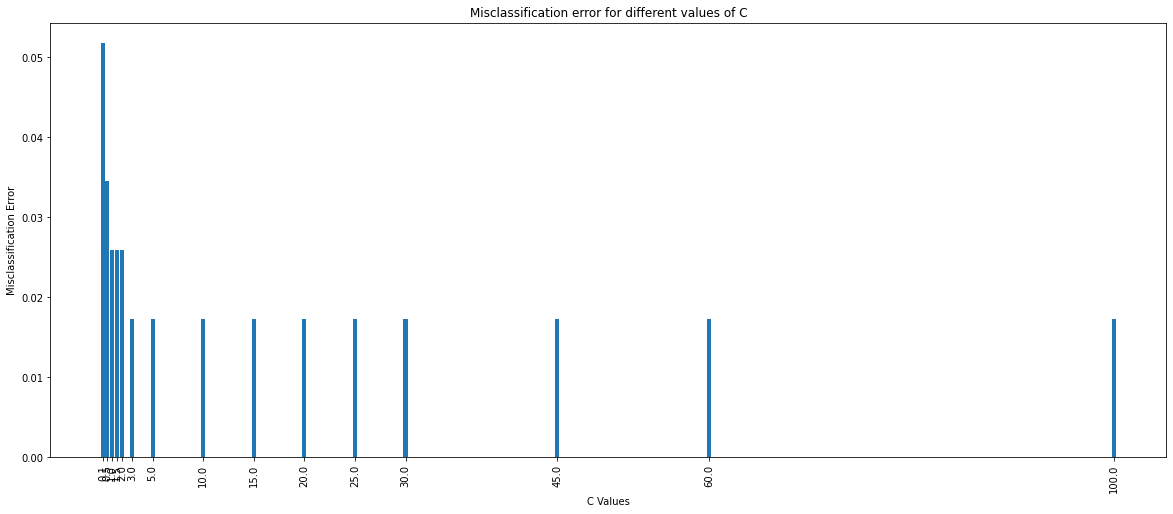

In [ ]:
plt.figure(figsize=(20,8))
plt.bar(clist,testacc,width=.4)
plt.xticks(clist,rotation=90)
plt.xlabel('C Values')
plt.ylabel('Misclassification Error')
plt.title('Misclassification error for different values of C')

Text(0.5, 1.0, 'Misclassification error for different values of C Train vs Test')

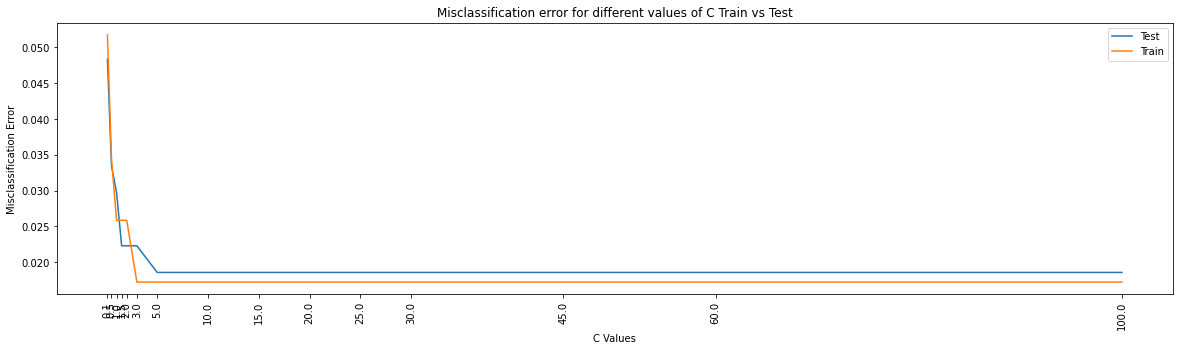

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(clist,trainacc,label='Test')
plt.plot(clist,testacc,label='Train')
plt.xticks(clist,rotation=90)
plt.legend()
plt.xlabel('C Values')
plt.ylabel('Misclassification Error')
plt.title('Misclassification error for different values of C Train vs Test')

Here we can clearly see that at different C values, which is the regualrization parameter, the misclassification error decreases as the regularization parameter increases. This means that the model starts to fit to the data after a certain point of time, the misclassification error becomes constant but the results are as expected with the misclassification error on the training data is less than that on the test data since it learns from the training data hence the error on the training data will obviously be lower than that on testing data


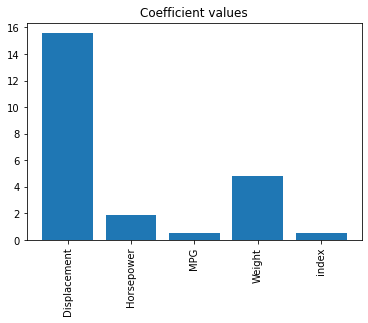

In [ ]:
m = LogReg.coef_
# Create plot
plt.figure()
# Create plot title
plt.title("Coefficient values")
# Add bars
plt.bar(range(X.shape[1]), abs(m[0]))
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
# Show plot
plt.show()

Here we can clearly see that the displacement parameter played the most important role in the features as the magnitude of its coefficient is the maximum followed by weight and horepower

In [ ]:
#As seen from the results above , we will now use the best value for c ie. 3
LogReg = LogisticRegression(solver='lbfgs', C=3)
LogReg.fit(X_train, y_train)
y_test_predicted = LogReg.predict(X_test)

In [ ]:
y_test_predicted = LogReg.predict(X_test)
y_test_predicted

array(['4 cylinder', '8 cylinder', '4 cylinder', '4 cylinder',
       '6 cylinder', '8 cylinder', '4 cylinder', '4 cylinder',
       '8 cylinder', '6 cylinder', '8 cylinder', '4 cylinder',
       '4 cylinder', '4 cylinder', '4 cylinder', '4 cylinder',
       '4 cylinder', '4 cylinder', '4 cylinder', '4 cylinder',
       '8 cylinder', '4 cylinder', '8 cylinder', '4 cylinder',
       '8 cylinder', '4 cylinder', '4 cylinder', '6 cylinder',
       '4 cylinder', '6 cylinder', '8 cylinder', '6 cylinder',
       '4 cylinder', '6 cylinder', '6 cylinder', '8 cylinder',
       '4 cylinder', '4 cylinder', '6 cylinder', '8 cylinder',
       '4 cylinder', '8 cylinder', '6 cylinder', '4 cylinder',
       '8 cylinder', '4 cylinder', '6 cylinder', '4 cylinder',
       '8 cylinder', '8 cylinder', '4 cylinder', '4 cylinder',
       '4 cylinder', '4 cylinder', '4 cylinder', '6 cylinder',
       '4 cylinder', '4 cylinder', '6 cylinder', '8 cylinder',
       '4 cylinder', '4 cylinder', '6 cylinder', '4 cyl

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_predicted)
print(cm)

[[60  0  0]
 [ 1 24  0]
 [ 0  1 30]]


Text(0.5, 1.0, '4 vs 6 vs 8 cylinder classification')

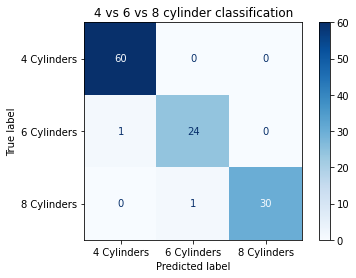

In [ ]:
disp = plot_confusion_matrix(LogReg, X_test, y_test,
                                 display_labels=('4 Cylinders','6 Cylinders','8 Cylinders'),
                                 cmap=plt.cm.Blues)
disp.ax_.set_title('4 vs 6 vs 8 cylinder classification')

In [ ]:

print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

  4 cylinder       0.98      1.00      0.99        60
  6 cylinder       0.96      0.96      0.96        25
  8 cylinder       1.00      0.97      0.98        31

    accuracy                           0.98       116
   macro avg       0.98      0.98      0.98       116
weighted avg       0.98      0.98      0.98       116



From the results we can see that logistic regression performed very well on this data. It misclassified just 2 data points , 1 for 6 cylinder and 1 for 8 cylinder. All the ones for 4 cylinder were classified perfectly.

The accuracy was also very high as seen in the classification report.

**Now we will use SVM** 


In [ ]:
#First Using Linear SVM
linear_sv = svm.SVC(C=2,kernel='linear')
linear_sv.fit(X_train, y_train)
y_test_predicted = linear_sv.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_predicted)
print(cm)

[[60  0  0]
 [ 0 25  0]
 [ 0  1 30]]


Text(0.5, 1.0, '4 vs 6 vs 8 cylinder classification')

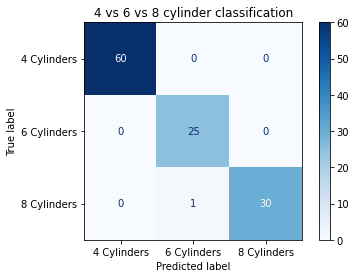

In [ ]:
disp = plot_confusion_matrix(linear_sv, X_test, y_test,
                                 display_labels=('4 Cylinders','6 Cylinders','8 Cylinders'),
                                 cmap=plt.cm.Blues)
disp.ax_.set_title('4 vs 6 vs 8 cylinder classification')

In [ ]:
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

  4 cylinder       1.00      1.00      1.00        60
  6 cylinder       0.96      1.00      0.98        25
  8 cylinder       1.00      0.97      0.98        31

    accuracy                           0.99       116
   macro avg       0.99      0.99      0.99       116
weighted avg       0.99      0.99      0.99       116



Here we see that the classification error is very very low and better than logistic regression.
Also from the confusion matrix, it is visible that only 1 value was misclassified ie. 1 8cylinder was predicted as 6 cylinder.
Other than that the accuracy was very high

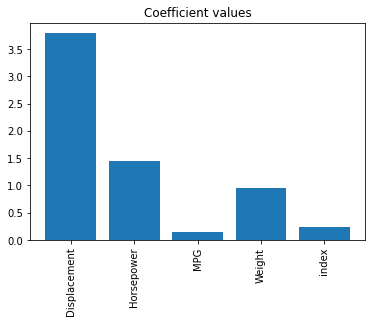

In [ ]:
#Finding out the feature importance by looking at the values of coefficients
m = linear_sv.coef_
# Create plot
plt.figure()
# Create plot title
plt.title("Coefficient values")
# Add bars
plt.bar(range(X.shape[1]), abs(m[0]))
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
# Show plot
plt.show()

According to the coefficient values, again displacement gets the highest value but here horsepower gets the second highest value as opposed to weight in logistic regression

In [ ]:
#Now using the radial kernel
rbf_sv = svm.SVC(C=5.5,kernel='rbf',gamma=.08)
rbf_sv.fit(X_train, y_train)
y_test_predicted = rbf_sv.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_predicted)
print(cm)

[[60  0  0]
 [ 0 25  0]
 [ 0  1 30]]


Text(0.5, 1.0, '4 vs 6 vs 8 cylinder classification')

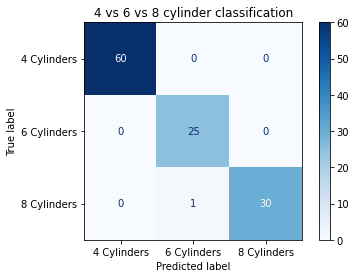

In [ ]:
disp = plot_confusion_matrix(rbf_sv, X_test, y_test,
                                 display_labels=('4 Cylinders','6 Cylinders','8 Cylinders'),
                                 cmap=plt.cm.Blues)
disp.ax_.set_title('4 vs 6 vs 8 cylinder classification')

In [ ]:
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

  4 cylinder       1.00      1.00      1.00        60
  6 cylinder       0.96      1.00      0.98        25
  8 cylinder       1.00      0.97      0.98        31

    accuracy                           0.99       116
   macro avg       0.99      0.99      0.99       116
weighted avg       0.99      0.99      0.99       116



Here also the accuracy was very high and the misclassification occured for just 1 data point.

In [ ]:
#For poly kernel
poly_sv = svm.SVC(C=30,kernel='poly',degree=3, gamma=.55) # class_weight='balanced' 
poly_sv.fit(X_train, y_train)
y_test_predicted = poly_sv.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_predicted)
print(cm)

[[57  3  0]
 [ 0 25  0]
 [ 0  2 29]]


Text(0.5, 1.0, '4 vs 6 vs 8 cylinder classification')

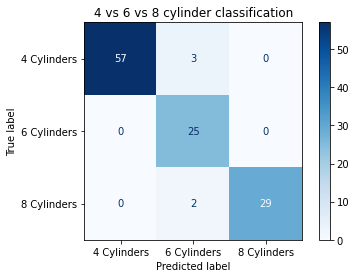

In [ ]:
disp = plot_confusion_matrix(poly_sv, X_test, y_test,
                                 display_labels=('4 Cylinders','6 Cylinders','8 Cylinders'),
                                 cmap=plt.cm.Blues)
disp.ax_.set_title('4 vs 6 vs 8 cylinder classification')

In [ ]:
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

  4 cylinder       1.00      0.95      0.97        60
  6 cylinder       0.83      1.00      0.91        25
  8 cylinder       1.00      0.94      0.97        31

    accuracy                           0.96       116
   macro avg       0.94      0.96      0.95       116
weighted avg       0.96      0.96      0.96       116



Here we can see that poly did not perform as well as the radial or poly kernel. The accuracy score was lower and also the misclassification rate was high with a total of 4 datapoints being misclassified.

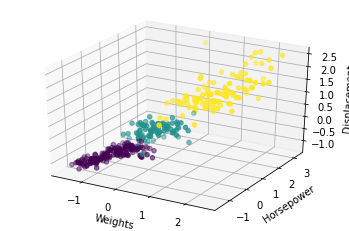

In [ ]:
#Plotting displacement vs horsepower vs weight
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(data2['Weight'], data2['Horsepower'],data2['Displacement'], c=data['Cylinders'])
ax.set_xlabel('Weights')
ax.set_ylabel('Horsepower')
ax.set_zlabel('Displacement');

Text(0.5, 1.0, 'Displacement vs Horsepower')

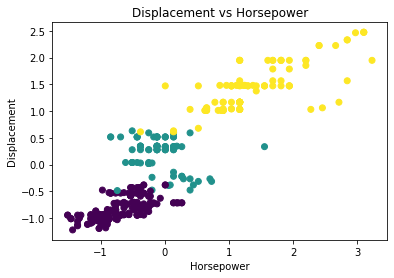

In [ ]:
#Plotting displacement vs horsepower
fig = plt.figure()
plt.scatter(data2['Horsepower'],data2['Displacement'], c=data['Cylinders'])
plt.xlabel('Horsepower')
plt.ylabel('Displacement')
plt.title('Displacement vs Horsepower')

Here we plot the top 3 features ie. Weights, horepower and displacement first and then the top 2 features ie. displacement and horespower to visually see if the data points can be really separated linearly and radially as suggested by the SVM accuracy we calculated above 

**Choice of Kernel**

Here we can clearly see that rbf kernel and the linear kernel performed the best. This was expected since when we see the data, we can easily see that it can be split linearly and radially both.

For the linear classification, it is quite simple, we can just split the data using a linear line or measure the angle from the centre. For radial classification, we can radially split the data in circles.

The poly kernel did not perform very well. One reason for it might be that most of the data present is in 3-4 degrees of freedom and many data points of different cylinders lie in the same degree of freedom.

**Hyperparameters tuning**


C is the inverse regularization parameter. It is the strength of regularization in SVM. Regularization is used to prevent overfitting. When the value of C is low, there is underfitting and the accuracy is not high. But as C increaes, the underfitting decreases and the accuracy increases. But if the value of C is too high, the model starts to overfit and increases its training accuracy and lower or constantize its testing accuracy

In SVM, C parameter alters the margin boundary for a soft margin SVM. The lower the value of C, the larger is the margin and hence taking more points into consideration along the separating plane. This takes into account more underfitting since more points can now be misclassified without being penalized. As the value of C starts increasing, the margin starts getting smaller and less points are now allowed to be misclassified due to the margin odf the soft margin SVM getting smaller. This can lead to overfitting as well.

The gamma parameter defines how far the influence of a single training example reaches, with low values meaning far and high values meaning close. The gamma parameters is the inverse of the radius of influence of samples selected by the model as support vectors. High gamma values means the radius of influence is very close which leads to overfitting, whereas low gamma values means that the radius of influence is far hence leading to underfitting.

Here, I have selected hyperparameters manually without using grid search since it was easier and less time consuming. This was due to the low no of observation values. If the observations were higher, manual hyperparameter tuning would become very difficult and time consuming.

**Decison Tree Classifier**

Testing for different values of ccp_alpha ( Pruning ) to reduce overfitting.Pruning refers to the removal of nodes to simplify by removing these unnecessary nodes. Sometimes our tree overfits by learning too much from the train data. Pruning removes the unnecessary nodes and makes the tree overfit less. Here the pruning is controlled by ccp_alpha parameter

We will try different values of ccp_alpha ( Pruning ) to reduce overfitting and check which value gets the lowest misclassification error.

Text(0.5, 1.0, 'Misclassification error for different values of pruning')

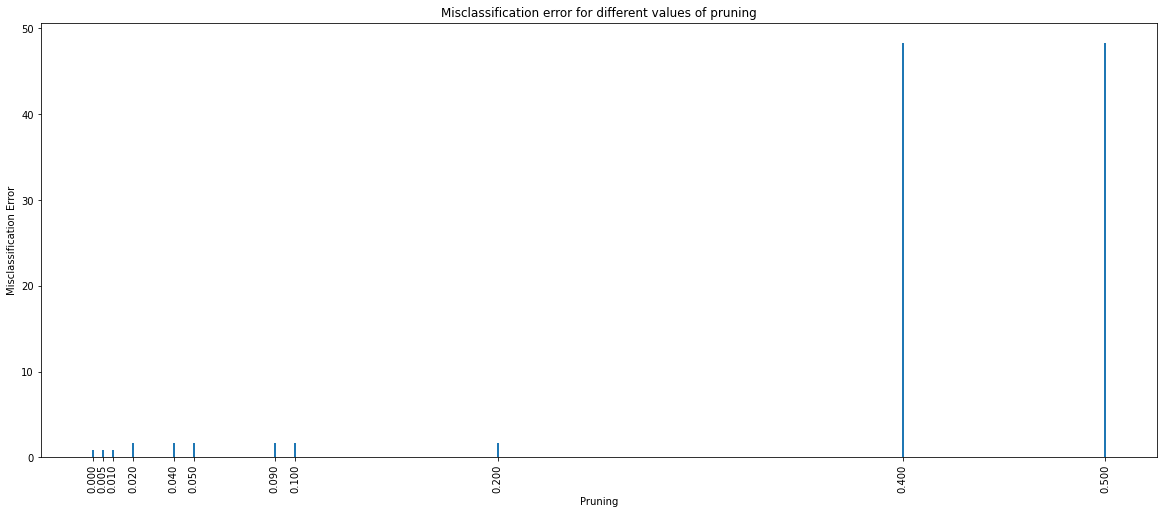

In [ ]:
accur=[]
lsit=[0,.005,.01,.02,.04,.05,.09,.1,.2,.4,.5]
for depth in lsit:
  estimator = DecisionTreeClassifier(min_samples_split=15, ccp_alpha=depth,max_depth=3)
  model_dt  = estimator.fit(X_train, y_train)
  y_test_predicted=model_dt.predict(X_test)
  accur.append(100-(100*accuracy_score(y_test, y_test_predicted, normalize = True)))
plt.figure(figsize=(20,8))
plt.bar(lsit,accur,width=.001)
plt.xticks(lsit,rotation=90)
plt.xlabel('Pruning')
plt.ylabel('Misclassification Error')
plt.title('Misclassification error for different values of pruning')


Here we can clearly see that the misclassification rate was low when the value of ccp_alpha was low but as soon as it came to .4, the misclassification rate rose very high. This means that the model starts to overfit. Hence we will select the value of ccp_alpha to be **.04**

In [ ]:
estimator = DecisionTreeClassifier(min_samples_split=15,max_depth=3,ccp_alpha=0.005)
model_dt  = estimator.fit(X_train, y_train)
y_test_predicted=model_dt.predict(X_test)
confusion_matrix(y_test, y_test_predicted)

array([[60,  0,  0],
       [ 1, 24,  0],
       [ 0,  1, 30]])

The other parameters were tuned by manual hyperparameter tuning. 

max_depth - the maximum depth or the splits the tree will have before terminating. This was set to 3 since the no of observations is 116 and it would not be appropriate to split it more than 3 depth as it would lead to overfitting

min_samples_split: minimum number of samples to split an internal node. This was set to 15 as a no lower than that would create too many nodes



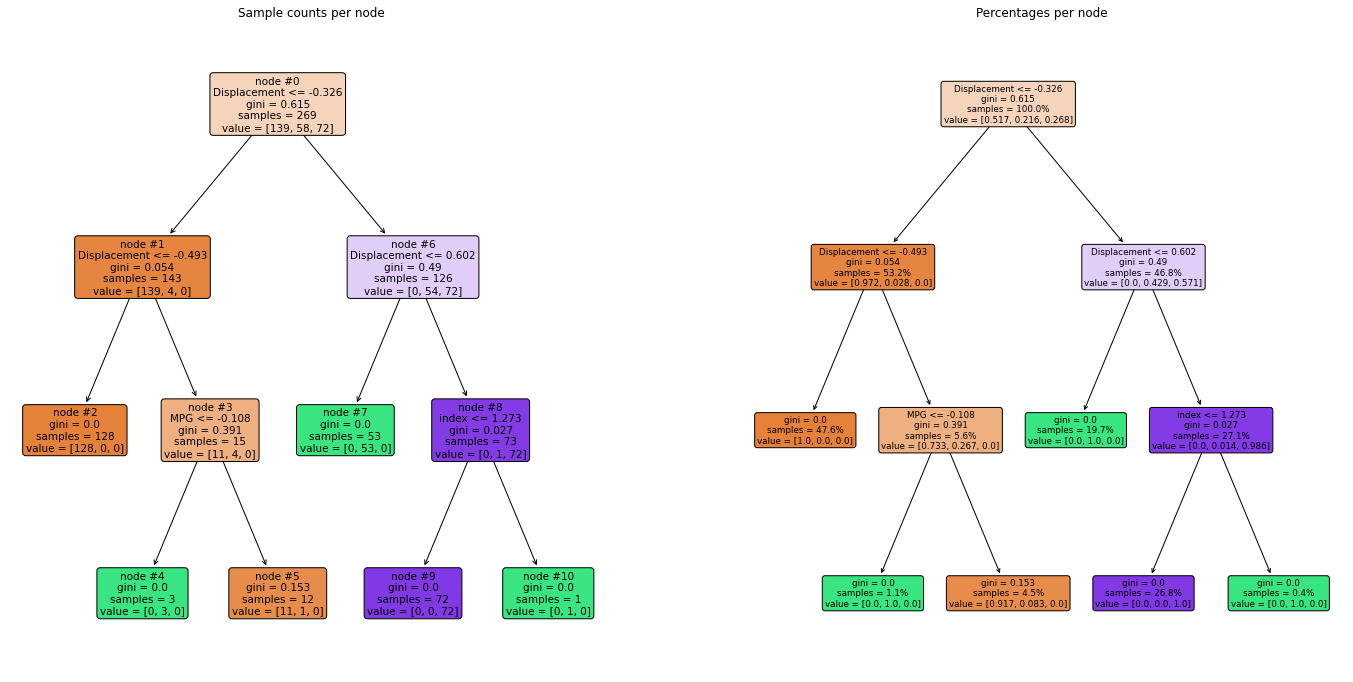

In [ ]:
#Plotting the tree
fig_1 = plt.figure(figsize=(24,12))

fig_1_a = plt.subplot(121)
axs1 = plot_tree(estimator, filled=True, feature_names = list(X.columns), rounded = True,  node_ids=True)
fig_1_a.set_title('Sample counts per node')

fig_1_b = plt.subplot(122)
axs2 = plot_tree(estimator, filled=True, feature_names = list(X.columns), rounded = True,  proportion=True)
fig_1_b.set_title('Percentages per node')

plt.show()

Text(0.5, 1.0, '4 vs 6 vs 8 cylinder classification')

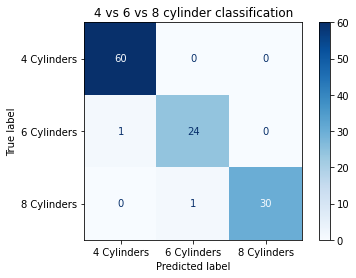

In [ ]:
disp = plot_confusion_matrix(model_dt, X_test, y_test,
                                 display_labels=('4 Cylinders','6 Cylinders','8 Cylinders'),
                                 cmap=plt.cm.Blues)
disp.ax_.set_title('4 vs 6 vs 8 cylinder classification')

In [ ]:
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

  4 cylinder       0.98      1.00      0.99        60
  6 cylinder       0.96      0.96      0.96        25
  8 cylinder       1.00      0.97      0.98        31

    accuracy                           0.98       116
   macro avg       0.98      0.98      0.98       116
weighted avg       0.98      0.98      0.98       116



Here we can see that the decision tree classifier also performed very well with 99% accuracy and only 1% misclassification rate

In [ ]:
#Table for missclassification rate of classification models
model=[LogReg,linear_sv,rbf_sv,poly_sv,model_dt]
model_name=['Logistic Reg','Linear SVM','Radial SVM','Polynomial SVM', 'Decision Tree classifier']
accuracy=[]
for mod in model:
  y_test_predicted=mod.predict(X_test)
  accuracy.append(100-(100*accuracy_score(y_test, y_test_predicted, normalize = True)))
df = pd.DataFrame(list(zip(model_name, accuracy)), 
               columns =['Model', 'Misclassification Rate']) 
df.sort_values(by='Misclassification Rate',ascending=False)

,Model,Misclassification Rate
3,Polynomial SVM,4.310345
0,Logistic Reg,1.724138
4,Decision Tree classifier,1.724138
1,Linear SVM,0.862069
2,Radial SVM,0.862069


From here we can see that Linear SVM , Radial SVM and Decision Tree Classifier performed the best. 

Text(0.5, 1.0, 'Misclassification error for different models')

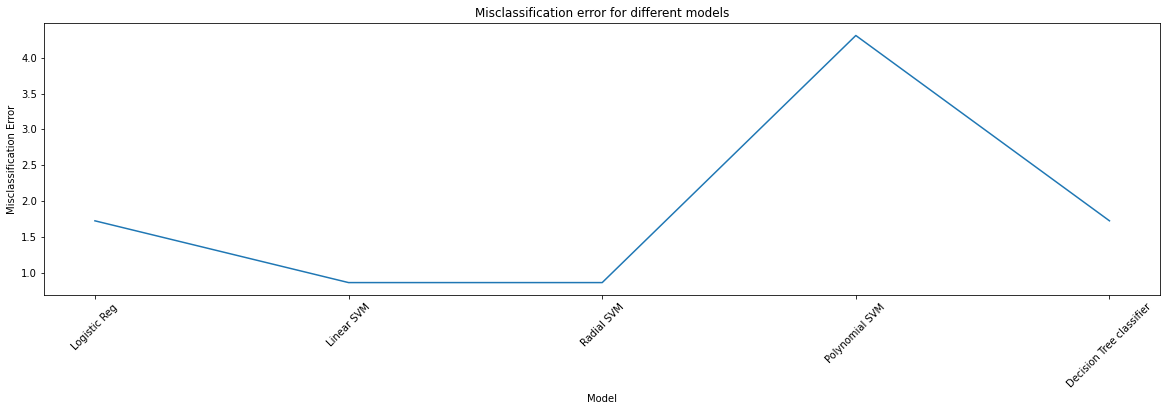

In [ ]:
#Plotting the misclassification rate for different models
plt.figure(figsize=(20,5))
plt.plot(model_name,accuracy)
plt.xticks(model_name,rotation=45)
plt.xlabel('Model')
plt.ylabel('Misclassification Error')
plt.title('Misclassification error for different models')

## **Regression**

In [ ]:
#Splitting Data into train and test splits
X=data.drop(columns=['Acceleration','Cylinders'])
Y=data['Cylinders']
# Create the instance of the scaler
scaler = StandardScaler()
# Normalizing the values
X_scaled = scaler.fit_transform(X)
X_scaled
X_train, X_test, y_train, y_test = train_test_split(X_scaled,Y,test_size=.3,random_state=12,stratify=Y)
y_test

334    4.0
152    8.0
288    4.0
276    4.0
376    6.0
      ... 
3      8.0
299    6.0
215    4.0
119    4.0
50     4.0
Name: Cylinders, Length: 116, dtype: float64

**Least squares with lambda = 0**

In [ ]:
#Finding mean squared error
model_LR = LinearRegression()
# Fit the model
model_LR.fit(X_train, y_train)
y_test_pred= model_LR.predict(X_test)
print('The mean squared Error is'+'  '+str(mean_squared_error(y_test, y_test_pred)))

The mean squared Error is  0.2968946244612012


In [ ]:
y_test_pred

array([3.64551524, 8.65077234, 3.74618088, 4.72719193, 5.99330352,
       7.93272183, 4.66395562, 4.72752121, 7.93093275, 6.01752793,
       8.58278431, 3.81093197, 4.63003163, 3.97591816, 4.79632167,
       4.49595971, 3.81315639, 3.84513683, 4.10442206, 3.78637406,
       7.93874122, 3.67398642, 8.72464787, 3.79742089, 7.89829218,
       4.10474998, 4.0605051 , 6.07507002, 4.68962289, 6.56292087,
       7.93218025, 5.6826987 , 4.66952444, 6.0694598 , 6.56111659,
       7.43932965, 4.51047222, 4.53851563, 4.90544022, 7.09484769,
       3.83185733, 7.22046688, 6.16749536, 3.81157647, 7.92052851,
       3.84041322, 4.99211802, 4.69167725, 7.20916013, 7.87856593,
       3.94158574, 4.5786452 , 3.97720466, 3.64410415, 4.06768183,
       6.00918018, 3.92789999, 4.9275731 , 6.23200145, 7.01879732,
       4.2848379 , 4.39479839, 6.46464412, 3.93915206, 5.08006242,
       6.61843635, 6.44291651, 6.12020669, 3.65510702, 3.84591571,
       7.26501868, 7.09075435, 3.78176854, 7.69088174, 6.06696

We can see that the values are continous

But we have to normalize the values so that they are exactly 4, 6 and 8 cylinders and not any decimal values

In [ ]:
#Normalizing values
for x in range(len(y_test_pred)):
  if x<len(y_test_pred):
    if y_test_pred[x]>=7:
      y_test_pred[x]=8
    elif y_test_pred[x]>=5 and y_test_pred[x]<7:
      y_test_pred[x]=6
    else:
      y_test_pred[x]=4
print('The mean squared Error is'+'  '+str(mean_squared_error(y_test, y_test_pred)))

The mean squared Error is  0.1724137931034483


In [ ]:
y_test_pred

array([4., 8., 4., 4., 6., 8., 4., 4., 8., 6., 8., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 8., 4., 8., 4., 8., 4., 4., 6., 4., 6., 8., 6., 4., 6.,
       6., 8., 4., 4., 4., 8., 4., 8., 6., 4., 8., 4., 4., 4., 8., 8., 4.,
       4., 4., 4., 4., 6., 4., 4., 6., 8., 4., 4., 6., 4., 6., 6., 6., 6.,
       4., 4., 8., 8., 4., 8., 6., 8., 8., 4., 4., 4., 4., 6., 4., 4., 4.,
       8., 4., 6., 8., 8., 6., 8., 4., 4., 4., 8., 4., 6., 8., 8., 8., 8.,
       6., 4., 4., 6., 4., 4., 4., 4., 4., 8., 4., 4., 4., 4.])

Here the values have been normalized

In [ ]:
print(confusion_matrix(y_test, y_test_pred))

[[60  0  0]
 [ 4 21  0]
 [ 0  1 30]]


Least Squares with Lasso ( L1 regularization )

Text(0.5, 1.0, 'Mean Square error for different values of Lasso regularization')

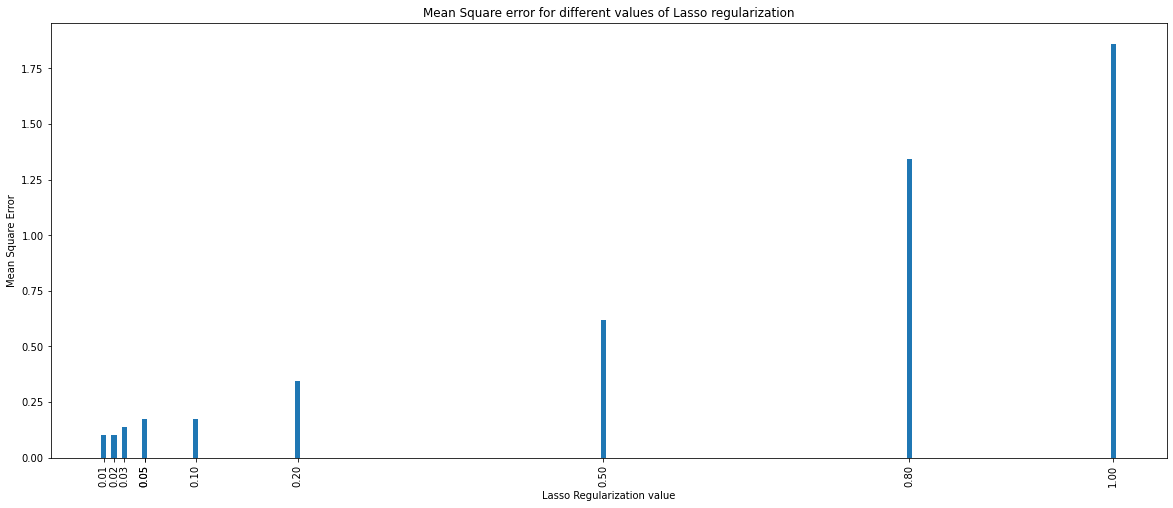

In [ ]:
accur=[]
lsit=[0.05,.01,.02,.03,.05,.1,.2,.5,.8,1]
for ap in lsit:
  model_lasso = linear_model.Lasso(alpha=ap)
  # Fit the model
  model_lasso.fit(X_train, y_train)
  y_test_pred= model_lasso.predict(X_test)
  for x in range(len(y_test_pred)):
    if x<len(y_test_pred):
      if y_test_pred[x]>=7:
        y_test_pred[x]=8
      elif y_test_pred[x]>=5 and y_test_pred[x]<7:
        y_test_pred[x]=6
      else:
        y_test_pred[x]=4
  accur.append(mean_squared_error(y_test, y_test_pred))
plt.figure(figsize=(20,8))
plt.bar(lsit,accur,width=.005)
plt.xticks(lsit,rotation=90)
plt.xlabel('Lasso Regularization value')
plt.ylabel('Mean Square Error')
plt.title('Mean Square error for different values of Lasso regularization')


Here we can see that the MSE starts increasing as soon as we start applying more regualrization
Lasso regularization is a penalty term that is applied in the objective function of the optimization problem. This helps in reducing overfitting. The higher value we go, the more the model starts to underfit. At a very high value we can see that the MSE is very high and the model is underfitting.

In [ ]:
model_lasso = linear_model.Lasso(alpha=.02)
# Fit the model
model_lasso.fit(X_train, y_train)
y_test_pred= model_lasso.predict(X_test)
for x in range(len(y_test_pred)):
  if x<len(y_test_pred):
    if y_test_pred[x]>=7:
      y_test_pred[x]=8
    elif y_test_pred[x]>=5 and y_test_pred[x]<7:
      y_test_pred[x]=6
    else:
      y_test_pred[x]=4
print('The mean squared Error is'+'  '+str(mean_squared_error(y_test, y_test_pred)))

The mean squared Error is  0.10344827586206896


The mean square error decreased from .17 to .103 after applying the lasso regularization., which is a huge difference. This meant that the model was overfitting in the normal least square method and by applying l1 regularization, the model decreased its overfitting

**SVM**

Linear SVM

In [ ]:
linear_sv = svm.SVC(C=2,kernel='linear')
linear_sv.fit(X_train, y_train)
y_test_pred= linear_sv.predict(X_test)
for x in range(len(y_test_pred)):
  if x<len(y_test_pred):
    if y_test_pred[x]>=7:
      y_test_pred[x]=8
    elif y_test_pred[x]>=5 and y_test_pred[x]<7:
      y_test_pred[x]=6
    else:
      y_test_pred[x]=4
print('The mean squared Error is'+'  '+str(mean_squared_error(y_test, y_test_pred)))

The mean squared Error is  0.034482758620689655


In [ ]:
print(confusion_matrix(y_test, y_test_pred))

[[60  0  0]
 [ 0 25  0]
 [ 0  1 30]]


Radial SVM

In [ ]:
rbf_sv = svm.SVC(C=5.5,kernel='rbf',gamma=.08)
rbf_sv.fit(X_train, y_train)
y_test_pred= rbf_sv.predict(X_test)
for x in range(len(y_test_pred)):
  if x<len(y_test_pred):
    if y_test_pred[x]>=7:
      y_test_pred[x]=8
    elif y_test_pred[x]>=5 and y_test_pred[x]<7:
      y_test_pred[x]=6
    else:
      y_test_pred[x]=4
print('The mean squared Error is'+'  '+str(mean_squared_error(y_test, y_test_pred)))

The mean squared Error is  0.034482758620689655


In [ ]:
print(confusion_matrix(y_test, y_test_pred))

[[60  0  0]
 [ 0 25  0]
 [ 0  1 30]]


Polynomial SVM

In [ ]:
poly_sv = svm.SVC(C=30,kernel='poly',degree=3, gamma=.55) # class_weight='balanced' 
poly_sv.fit(X_train, y_train)
y_test_pred= poly_sv.predict(X_test)
for x in range(len(y_test_pred)):
  if x<len(y_test_pred):
    if y_test_pred[x]>=7:
      y_test_pred[x]=8
    elif y_test_pred[x]>=5 and y_test_pred[x]<7:
      y_test_pred[x]=6
    else:
      y_test_pred[x]=4
print('The mean squared Error is'+'  '+str(mean_squared_error(y_test, y_test_pred)))

The mean squared Error is  0.1724137931034483


In [ ]:
print(confusion_matrix(y_test, y_test_pred))

[[57  3  0]
 [ 0 25  0]
 [ 0  2 29]]


Here we can clearly see that rbf kernel and the linear kernel performed the best. This was expected since when we see the data, we can easily see that it can be split linearly and radially both.

For the linear SVM regression, it is quite simple, we can just split the data using a linear line or measure the angle from the centre. For radial SVM, we can radially split the data in circles.

The poly kernel did not perform very well. One reason for it might be that most of the data present is in 3-4 degrees of freedom and many data points of different cylinders lie in the same degree of freedom.

Hyperparameter Tuning - When different parameters were tried but it was found that it performed best on the hyperparameters tuned for the classification analysis.

**Decision Trees**

In [ ]:
estimator = DecisionTreeClassifier(min_samples_split=15,max_depth=3,ccp_alpha=0.005)
model_dt  = estimator.fit(X_train, y_train)
y_test_pred=model_dt.predict(X_test)
for x in range(len(y_test_pred)):
  if x<len(y_test_pred):
    if y_test_pred[x]>=7:
      y_test_pred[x]=8
    elif y_test_pred[x]>=5 and y_test_pred[x]<7:
      y_test_pred[x]=6
    else:
      y_test_pred[x]=4
print('The mean squared Error is'+'  '+str(mean_squared_error(y_test, y_test_pred)))

The mean squared Error is  0.034482758620689655


In [ ]:
print(confusion_matrix(y_test, y_test_pred))

[[60  0  0]
 [ 1 24  0]
 [ 0  0 31]]


Again trees also performed very well and they also got a low mean squared error equivalent to radial and linear SVM.

In [ ]:
#Table for missclassification rate of classification models
model=[model_LR,model_lasso,linear_sv,rbf_sv,poly_sv,model_dt]
model_name=['Linear Regression','Lasso Regression','Linear SVM','Radial SVM','Polynomial SVM', 'Decision Tree classifier']
accuracy=[]
for mod in model:
  y_test_pred=mod.predict(X_test)
  for x in range(len(y_test_pred)):
    if x<len(y_test_pred):
      if y_test_pred[x]>=7:
        y_test_pred[x]=8
      elif y_test_pred[x]>=5 and y_test_pred[x]<7:
        y_test_pred[x]=6
      else:
        y_test_pred[x]=4
  accuracy.append(mean_squared_error(y_test, y_test_pred))
df = pd.DataFrame(list(zip(model_name, accuracy)), 
               columns =['Model', 'Misclassification Rate']) 
df.sort_values(by='Misclassification Rate',ascending=True)

,Model,Misclassification Rate
2,Linear SVM,0.034483
3,Radial SVM,0.034483
5,Decision Tree classifier,0.034483
1,Lasso Regression,0.103448
0,Linear Regression,0.172414
4,Polynomial SVM,0.172414


Text(0.5, 1.0, 'Mean squared error for different models')

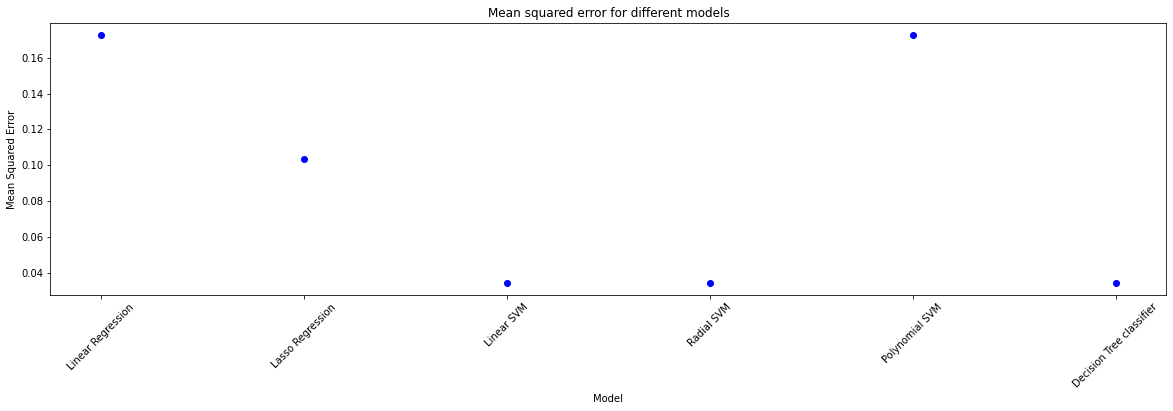

In [ ]:
#Plotting the misclassification rate for different models
plt.figure(figsize=(20,5))
plt.plot(model_name,accuracy,'bo')
plt.xticks(model_name,rotation=45)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Mean squared error for different models')

Here Linear SVM , Radial SVM and Decision Trees performed the best as in the classification problem

**Here I did not explain regression problems much since I already explained them in the classification section. They were the same for the regression section. We were told by the prof to convert the values to whole integers ie. 4,6,8 cylinders. Which essentially makes it kind of a classification problem. If it had not been the case then it would differ from the classification problem as the values would vary alot since each value would be in decimals and continous**